In [ ]:
!pip install nltk
import nltk

nltk.download('punkt_tab')
nltk.download('punkt')

from IPython import get_ipython
from IPython.display import display
!pip install datasets

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from datasets import load_dataset

def load_dataset_subset(num_samples: int = 100) -> list:
    """Load a subset of the wikipedia"""

    dataset = load_dataset("ramadita/indo-islamic-article", split="train")
    print(dataset[:5])
    texts = dataset['content'][:num_samples]  # Limit to a small subset
    return texts

texts = load_dataset_subset(num_samples=10)  # Load 10 samples for demonstration


README.md:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/162M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/40.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45995 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11499 [00:00<?, ? examples/s]

{'title': ['Kekuatan Ikhlas dan Potret Ulama Salaf dalam Keikhlasan', 'Shalat ‘Idain dan Dasar Hukum Pelaksanaannya', '1256. MACAM-MACAM MURTAD', 'Hadirnya wanita di masjid dan keutamaan shalat  Wanita di rumahnya', 'Menyusukan anak'], 'url': ['https://muslim.or.id/78151-kekuatan-ikhlas-dan-potret-ulama-salaf-dalam-keikhlasan.html', 'https://fatwatarjih.or.id/shalat-idain-dan-dasar-hukum-pelaksanaannya/', 'https://www.piss-ktb.com/2012/03/1256-macam-macam-murtad.html', 'https://belajarislam.com/2017/04/hadirnya-wanita-di-masjid-dan-keutamaan-shalat-wanita-di-rumahnya/', 'https://www.laduni.id/alquran/tema/tema-ayat-quran-Menyusukan-anak'], 'content': ['Daftar Isi Allah berfirman, \u2060 Dan tidaklah mereka diperintahkan melainkan supaya beribadah kepada Allah dengan mengikhlaskan amal (ketaatan) kepada-Nya dalam menjalani agama yang lurus, mendirikan salat, menunaikan zakat. Itulah agama yang lurus. (QS. Al-Bayyinah: 5) Allah juga berfirman, ࣰ Sesungguhnya Kami menurunkan kepadamu Al-K

FIXED LENGTH CHUNKING


In [ ]:
from nltk.tokenize import word_tokenize

def fixed_length_chunks(text: str, chunk_size: int = 100) -> list:
    """Split text into fixed-length word chunks."""
    words = word_tokenize(text)
    return [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]


SENTENCE LENGTH CHUNKING


In [ ]:
from nltk.tokenize import sent_tokenize

def sentence_based_chunks(text: str, sentences_per_chunk: int = 3) -> list:
    """Split text into sentence-based chunks."""
    sentences = sent_tokenize(text)
    return [' '.join(sentences[i:i + sentences_per_chunk]) for i in range(0, len(sentences), sentences_per_chunk)]


PARA LENGTH CHUNKING

In [ ]:
def paragraph_based_chunks(text: str) -> list:
    """Split text into paragraph-based chunks."""
    return [p.strip() for p in text.split('\n\n') if p.strip()]


CHUNK QUALITY CHECKING

INFORMATION DENSITY


In [ ]:
def calculate_information_density(chunk: str) -> float:
    """Calculate information density as the ratio of unique words to total words."""
    words = word_tokenize(chunk.lower())
    unique_words = set(words)
    return len(unique_words) / len(words) if words else 0


SEMANTIC COHERENCE

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

def calculate_semantic_coherence(chunks: list) -> float:
    """Calculate average semantic coherence between consecutive chunks."""
    if len(chunks) < 2:
        return 1.0
    embeddings = model.encode(chunks)
    similarities = [
        cosine_similarity(embeddings[i].reshape(1, -1), embeddings[i + 1].reshape(1, -1))[0][0]
        for i in range(len(embeddings) - 1)
    ]
    return np.mean(similarities)


CONTEXT OVERLAP

In [ ]:
def calculate_context_overlap(chunks: list) -> float:
    """Calculate average word overlap between consecutive chunks."""
    if len(chunks) < 2:
        return 1.0
    overlaps = [
        len(set(word_tokenize(chunks[i].lower())).intersection(word_tokenize(chunks[i + 1].lower()))) /
        len(set(word_tokenize(chunks[i].lower())).union(word_tokenize(chunks[i + 1].lower())))
        for i in range(len(chunks) - 1)
    ]
    return np.mean(overlaps)


ANALYSE CHUNKS ON THE BASIS OF METRICS

In [ ]:
def analyze_chunks(chunks: list) -> dict:
    """Analyze chunks using multiple metrics."""
    return {
        'num_chunks': len(chunks),
        'avg_chunk_length': np.mean([len(word_tokenize(chunk)) for chunk in chunks]),
        'information_density': np.mean([calculate_information_density(chunk) for chunk in chunks]),
        'semantic_coherence': calculate_semantic_coherence(chunks),
        'context_overlap': calculate_context_overlap(chunks),
    }


COMPARING THE CHUNKS

In [ ]:
def compare_chunking_methods(texts: list):
    """Compare metrics for different chunking methods."""
    results = {}
    for text in texts:
        # Analyze chunks for different methods
        fixed_metrics = analyze_chunks(fixed_length_chunks(text))
        sentence_metrics = analyze_chunks(sentence_based_chunks(text))
        paragraph_metrics = analyze_chunks(paragraph_based_chunks(text))

        # Store the results
        results[text[:50]] = {
            'fixed_length': fixed_metrics,
            'sentence_based': sentence_metrics,
            'paragraph_based': paragraph_metrics
        }

        # Print the results for the current text
        print(f"Results for text: {text[:50]}...")
        print(f"Fixed Length: {fixed_metrics}")
        print(f"Sentence Based: {sentence_metrics}")
        print(f"Paragraph Based: {paragraph_metrics}\n")

    return results

# Assuming 'texts' is already defined, call the function
results = compare_chunking_methods(texts)


Results for text: Daftar Isi Allah berfirman, ⁠ Dan tidaklah mereka ...
Fixed Length: {'num_chunks': 12, 'avg_chunk_length': 93.91666666666667, 'information_density': 0.6675617283950617, 'semantic_coherence': 0.8244835, 'context_overlap': 0.20775675960937895}
Sentence Based: {'num_chunks': 25, 'avg_chunk_length': 45.08, 'information_density': 0.7876560171714729, 'semantic_coherence': 0.79182434, 'context_overlap': 0.1631021358146368}
Paragraph Based: {'num_chunks': 1, 'avg_chunk_length': 1127.0, 'information_density': 0.35790408525754885, 'semantic_coherence': 1.0, 'context_overlap': 1.0}

Results for text: 1. Hukum salat ‘Idain (Idulfitri dan Iduladha) ada...
Fixed Length: {'num_chunks': 7, 'avg_chunk_length': 90.42857142857143, 'information_density': 0.6697835497835498, 'semantic_coherence': 0.8242719, 'context_overlap': 0.20741717903201895}
Sentence Based: {'num_chunks': 10, 'avg_chunk_length': 63.3, 'information_density': 0.7394789083867057, 'semantic_coherence': 0.8882698, 'contex

ANALYSE TOKEN EFFICIENCY

In [ ]:
# Token Efficiency
def calculate_token_efficiency(chunk: str) -> float:
    """Calculate token efficiency as the ratio of non-stopwords to total words."""
    words = word_tokenize(chunk.lower())
    non_stopwords = [word for word in words if word not in stopwords.words('english')]
    return len(non_stopwords) / len(words) if words else 0

# Compression Ratio
def calculate_compression_ratio(original_text: str, chunks: list) -> float:
    """Calculate compression ratio as the ratio of chunked text length to original text length."""
    original_length = len(word_tokenize(original_text))
    chunked_length = sum(len(word_tokenize(chunk)) for chunk in chunks)
    return chunked_length / original_length if original_length else 0


Analyze semantic preservation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def calculate_semantic_preservation(original_text: str, chunks: list) -> float:
    """Calculate semantic preservation between original text and concatenated chunks."""
    original_embedding = model.encode([original_text])[0]
    concatenated_chunks = ' '.join(chunks)
    chunked_embedding = model.encode([concatenated_chunks])[0]

    similarity = cosine_similarity([original_embedding], [chunked_embedding])[0][0]

    # Visualize the semantic preservation score
    plt.figure(figsize=(6, 4))
    plt.bar(['Original vs Chunked'], [similarity], color='skyblue')
    plt.ylabel('Cosine Similarity')
    plt.title('Semantic Preservation Score')
    plt.ylim(0, 1)  # Cosine similarity ranges from 0 to 1
    plt.show()

    return similarity


In [ ]:
def compare_token_efficiency_and_compression(text: str) -> dict:
    """Compare token efficiency and compression ratio for chunking methods."""
    methods = {
        'fixed_length': fixed_length_chunks(text),
        'sentence_based': sentence_based_chunks(text),
        'paragraph_based': paragraph_based_chunks(text)

    }
    results = {}
    for method, chunks in methods.items():
        results[method] = {
            'token_efficiency': np.mean([calculate_token_efficiency(chunk) for chunk in chunks]),
            'compression_ratio': calculate_compression_ratio(text, chunks)
        }
    return results


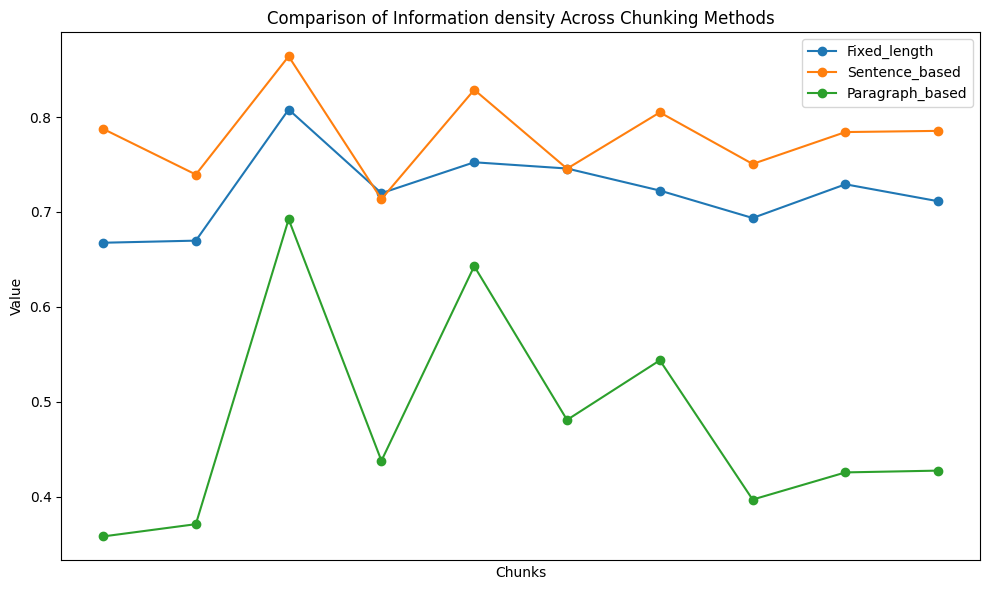

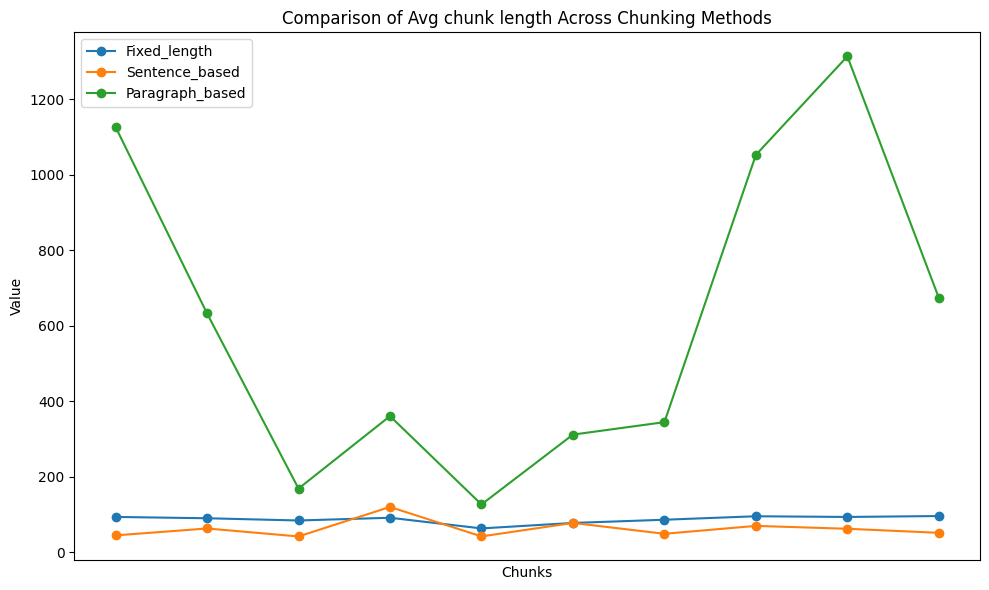

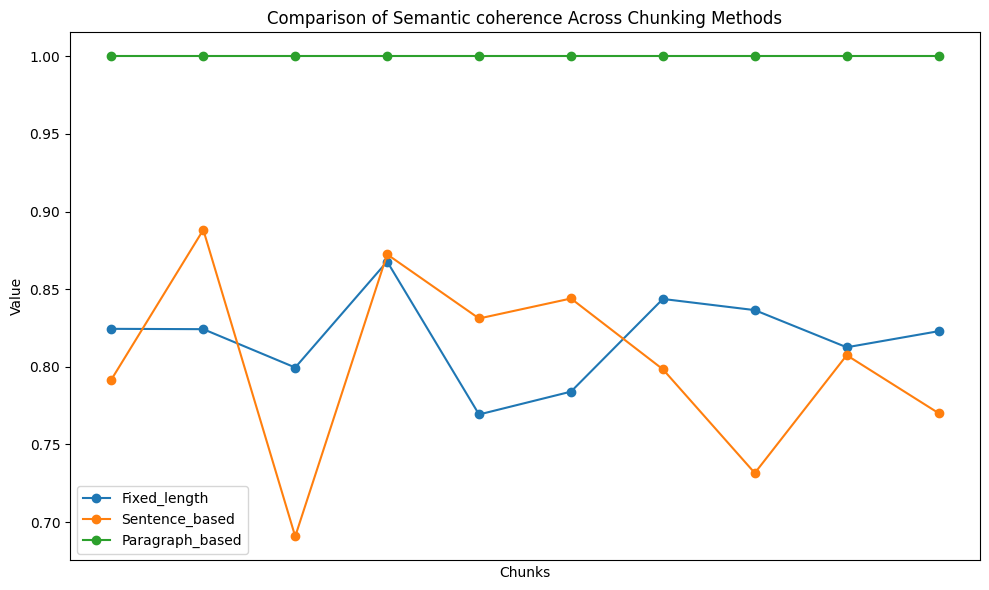

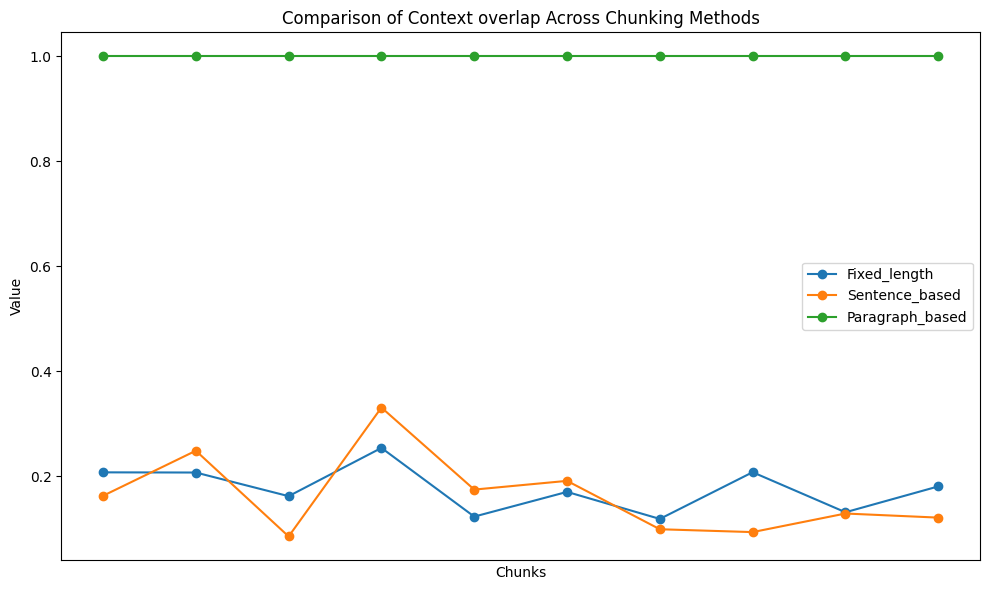

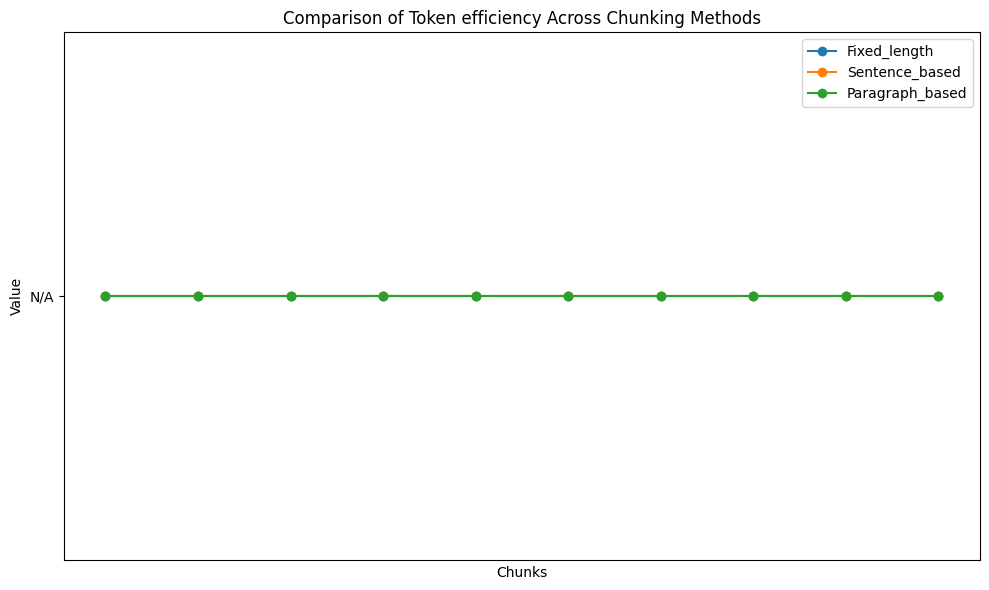

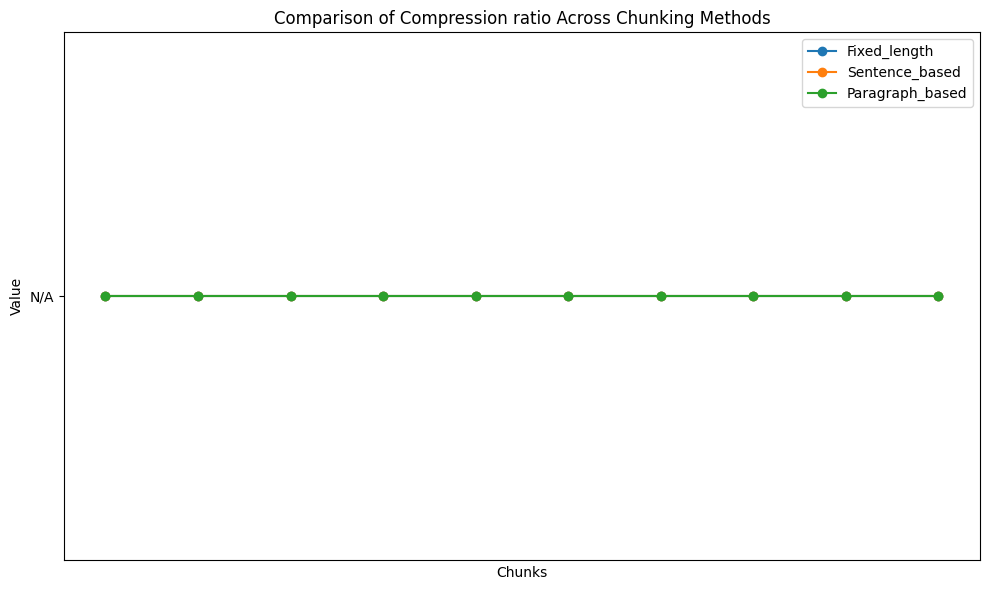

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_results(results):
    # List of methods to compare
    methods = ['fixed_length', 'sentence_based', 'paragraph_based']

    # List of metrics to visualize
    metrics = ['information_density', 'avg_chunk_length', 'semantic_coherence', 'context_overlap', 'token_efficiency', 'compression_ratio']

    # Create a plot for each metric
    for metric in metrics:
        plt.figure(figsize=(10, 6))

        # Gather the values for each method for the current metric
        method_values = {method: [] for method in methods}  # Prepare empty list for each method
        for text in results:
            for method in methods:
                method_values[method].append(results[text][method].get(metric, 'N/A'))

        # Plot the lines for the current metric
        for method in methods:
            plt.plot(list(results.keys()), method_values[method], marker='o', label=method.capitalize())

        # Set labels, title, and legend
        plt.xlabel('Chunks')
        plt.ylabel('Value')
        plt.title(f'Comparison of {metric.replace("_", " ").capitalize()} Across Chunking Methods')

        # Remove x-axis tick labels (the texts from each chunk)
        plt.xticks([])  # This will remove the chunk names from the x-axis

        # Add a legend to identify each chunking method
        plt.legend()

        # Adjust the layout to prevent overlapping of labels
        plt.tight_layout()

        # Show the plot
        plt.show()


visualize_results(results)


In [ ]:
def document_tradeoffs(results: dict) -> str:

    summary = "Trade-offs between chunking methods:\n"

    for method, metrics in results.items():
        summary += f"\nMethod: {method.capitalize()}\n"
        summary += f" - Token Efficiency: {metrics.get('token_efficiency', 'N/A')}\n"
        summary += f" - Compression Ratio: {metrics.get('compression_ratio', 'N/A')}\n"
        summary += f" - Semantic Coherence: {metrics.get('semantic_coherence', 'N/A')}\n"
        summary += f" - Context Overlap: {metrics.get('context_overlap', 'N/A')}\n"
        summary += f" - Information Density: {metrics.get('information_density', 'N/A')}\n"
        summary += f" - Processing Efficiency: {metrics.get('processing_efficiency', 'N/A')}\n"
        summary += f" - Flexibility: {metrics.get('flexibility', 'N/A')}\n"

    return summary
